Dataset loaded successfully.

--- Initial DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  

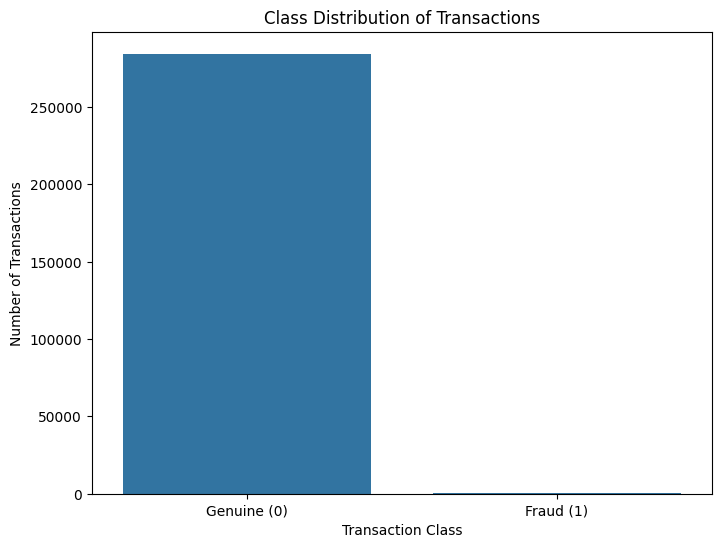

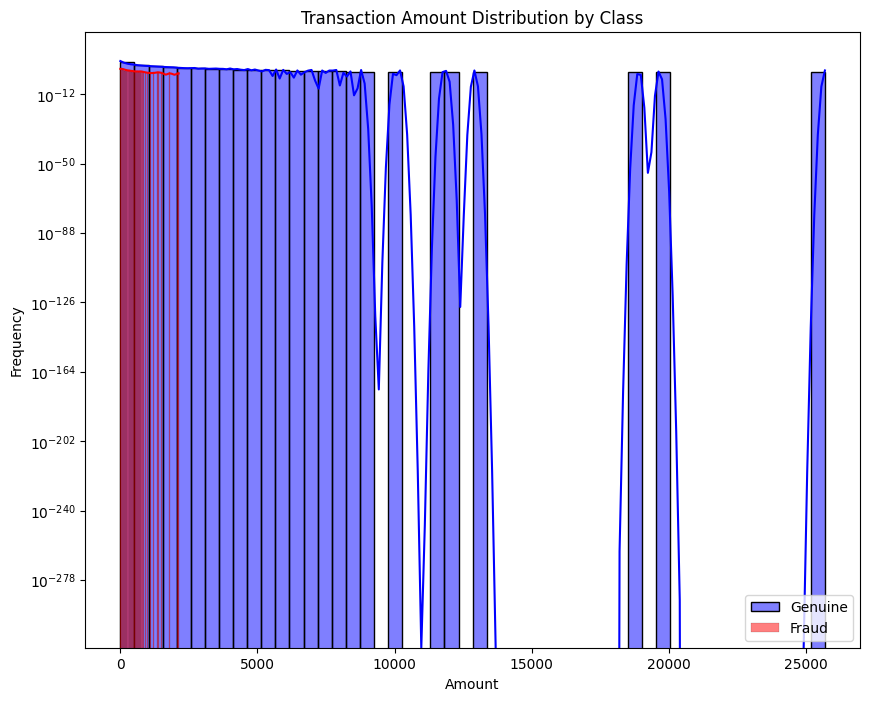


--- EDA Conclusion ---
The dataset is highly imbalanced, with fraudulent transactions making up less than 0.2% of the total.
This severe imbalance makes it difficult to train a standard machine learning model effectively.
The next step will be to use a generative model (CTGAN) to create synthetic fraud data to balance the dataset.


In [1]:
# ==============================================================================
# Notebook 1: Exploratory Data Analysis (EDA)
#
# This notebook is for initial data exploration. It loads the credit card fraud
# dataset, examines its structure, and visualizes the class imbalance.
# ==============================================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- 1. Load the Dataset ------------------------------------------------------
# Make sure the 'creditcard.csv' file is in the 'Data' folder.
data_path = os.path.join('C:\\Users\\pvgre\\Desktop\\Proposals\\GNCIPL_mini_projects\\Synthetic_Fraud_AI_Project\\Data', 'creditcard.csv')
try:
    # This line attempts to load the dataset into the 'df' variable.
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{data_path}' was not found.")
    print("Please ensure 'creditcard.csv' is in a 'Data' subfolder.")
    exit()

# --- 2. Initial Data Inspection -----------------------------------------------
print("\n--- Initial DataFrame Info ---")
df.info()

print("\n--- First 5 rows of the dataset ---")
print(df.head())

print("\n--- Summary Statistics ---")
print(df.describe())

# --- 3. Check for Missing Values ----------------------------------------------
print("\n--- Missing values per column ---")
print(df.isnull().sum())
# The output should show no missing values.

# --- 4. Analyze the Class Distribution ----------------------------------------
# The 'Class' column indicates genuine (0) and fraudulent (1) transactions.
print("\n--- Class Distribution ---")
class_counts = df['Class'].value_counts()
print(class_counts)
print(f"\nGenuine transactions (Class 0): {class_counts[0]}")
print(f"Fraudulent transactions (Class 1): {class_counts[1]}")

# Calculate and print the percentage of fraudulent transactions.
fraud_percentage = (class_counts[1] / len(df)) * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.4f}%")

# --- 5. Visualize the Class Imbalance -----------------------------------------
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution of Transactions')
plt.xticks([0, 1], ['Genuine (0)', 'Fraud (1)'])
plt.xlabel('Transaction Class')
plt.ylabel('Number of Transactions')
plt.show()

# --- 6. Visualize the 'Amount' feature for both classes -----------------------
plt.figure(figsize=(10, 8))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Genuine', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Use a log scale for better visualization of the small fraud count
plt.legend()
plt.show()

# --- EDA Conclusion ---
print("\n--- EDA Conclusion ---")
print("The dataset is highly imbalanced, with fraudulent transactions making up less than 0.2% of the total.")
print("This severe imbalance makes it difficult to train a standard machine learning model effectively.")
print("The next step will be to use a generative model (CTGAN) to create synthetic fraud data to balance the dataset.")
